In [58]:




import numpy as np

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.filters
import skimage.morphology
import skimage.segmentation
import matplotlib.pyplot as plt
import matplotlib.patches as patchess

import numpy as np


import numpy as np

# use for a "no activation" layer
def linear(x):
    return x

def linear_deriv(post_act):
    return np.ones_like(post_act)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(post_act):
    return 1-post_act**2

def relu(x):
    return np.maximum(x,0)

def relu_deriv(x):
    return (x > 0).astype(np.float)
# do not include any more libraries here!
# do not put any code outside of functions!

############################## Q 2.1 ##############################
# initialize b to 0 vector
# b should be a 1D array, not a 2D array with a singleton dimension
# we will do XW + b. 
# X be [Examples, Dimensions]
def initialize_weights(in_size,out_size,params,name=''):
    W, b = None, None

    ##########################
    ##### your code here #####
    ##########################
    #W = 2/(in_size+out_size)
    W = np.random.uniform(-np.sqrt(6)/np.sqrt(out_size + in_size) ,np.sqrt(6)/np.sqrt(out_size + in_size),(in_size,out_size))
    
    
    b = np.zeros((out_size))
    #print(b.shape)
    params['W' + name] = W
    params['b' + name] = b

############################## Q 2.2.1 ##############################
# x is a matrix
# a sigmoid activation function
def sigmoid(x):
    
    
    
    
    res = None


    res = 1/ (1+np.exp(-x))


    return res

############################## Q 2.2.1 ##############################
def forward(X,params,name='',activation=sigmoid):
    """
    Do a forward pass

    Keyword arguments:
    X -- input vector [Examples x D]
    params -- a dictionary containing parameters
    name -- name of the layer
    activation -- the activation function (default is sigmoid)
    """
    pre_act, post_act = None, None
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]
    
    
    #print(W.shape)
#pre and post in a loop or will it be called in the main ?
    pre_act = np.dot(X,W) + b
    
    post_act = activation(pre_act)
    

    # store the pre-activation and post-activation values
    # these will be important in backprop
    params['cache_' + name] = (X, pre_act, post_act)

    return post_act

############################## Q 2.2.2  ##############################
# x is [examples,classes]
# softmax should be done for each row
def softmax(x):
    # print('x: ', x)

    res = np.zeros(x.shape)
    c = -np.max(x, axis=1).reshape((x.shape[0],1))
    # print("x shape: ", x.shape)
    # print("c shape: ", c.shape)
    
    x += c
    ex = np.exp(x)
    deno_Sum = np.sum(ex, axis=1)
    res = np.divide(ex, deno_Sum.reshape((-1,1)))    
    #for i in range(x.shape[0]):
     #   res[i] = np.exp(x[i]) / np.sum(x)
    
    

    return res

############################## Q 2.2.3 ##############################
# compute total loss and accuracy
# y is size [examples,classes]
# probs is size [examples,classes]
def compute_loss_and_acc(y, probs):
    loss, acc = None, None

    loss = - np.sum(y * np.log(probs))
    
    correctPredictions = np.sum(np.equal(np.argmax(y, axis=-1), np.argmax(probs, axis=-1)))
    totalPredictions = y.shape[0]
    acc = correctPredictions/totalPredictions


    return loss, acc 

############################## Q 2.3 ##############################
# we give this to you
# because you proved it
# it's a function of post_act
def sigmoid_deriv(post_act):
    res = post_act*(1.0-post_act)
    return res

def backwards(delta,params,name='',activation_deriv=sigmoid_deriv):
    """
    Do a backwards pass

    Keyword arguments:
    delta -- errors to backprop
    params -- a dictionary containing parameters
    name -- name of the layer
    activation_deriv -- the derivative of the activation_func
    """
    grad_X, grad_W, grad_b = None, None, None
    # everything you may need for this layer
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # do the derivative through activation first
    # then compute the derivative W,b, and X
    
    act_der_del = activation_deriv(post_act)  #finding the der of loss Func
    delta = delta * act_der_del

    grad_W = np.dot(X.T, delta) 
    grad_X = np.dot(delta, W.T)
    
    
    #print("111", X.shape,W.shape,b.shape, delta.shape)
    
    y_wrt_b = np.ones((1, delta.shape[0]))
    
    grad_b = np.dot(y_wrt_b, delta).reshape(-1)
    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

############################## Q 2.4 ##############################
# split x and y into random batches
# return a list of [(batch1_x,batch1_y)...]
def get_random_batches(x,y,batch_size):
    batches = []
    
    
  #  batchx = np.zeros((batch_size, x.shape[1]))
  #  batchy = np.zeros((batch_size, y.shape[1]))
    
    
    for i in range(0,np.int(x.shape[0]/batch_size)):
        
        idx = np.random.choice(np.arange(x.shape[0]), size=batch_size, replace=False)   
        batchx = x[idx]
        batchy = y[idx]
        batches.append((batchx,batchy))

    return batches



In [59]:
def findLetters(image):
    bboxes = []
    bw = None
    
    # processing needs gray, opening etc.
    gray = skimage.color.rgb2gray(image)
   
    
    #noise reduction
    blurred = skimage.filters.gaussian(gray, sigma=1.0)
    #plt.imshow(blurred)
    
    #getting thresold value based on OTSU?
    threshold = skimage.filters.threshold_otsu(blurred)
    
    #around 0.46?   
    #get value after thresolding
    binary = gray <= threshold
    
    
    #erosion followed by dilation
    opening = skimage.morphology.binary_opening(binary)
    
    
    #getting area based on connectivity with neigbouring pixels ? probably means that if the pixel 
    #vlaues are same , it joins em ? since binary is only grayscale values, it's easier for grping?
    
    labels = skimage.measure.label(opening)
    regions = skimage.measure.regionprops(labels)
    
    Region = 0
    for i in regions :
        Region = Region + i.area
    MeanRegion = Region/len(regions)
    
    
    
    for i in regions :
        if i.area > MeanRegion/2.5:
            
            bboxes.append(i.bbox)
            x1,y1,x2,y2=i.bbox
        
            #Plot check if bboxes are  right
            #plt.gca().add_patch(patchess.Rectangle((y1,x1), y2-y1,x2-x1 ,fill=False, edgecolor='red', linewidth=1))
            #plt.imshow(opening)
            
            #plt.set_axis_off()
            #plt.tight_layout()
    plt.show()  

    
    
    
    
    
    
    
    
    bw  = 1 - gray
    
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes 
    # this can be 10 to 15 lines of code using skimage functions

    ##########################
    ##### your code here #####
    ##########################

    return bboxes, bw







In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.segmentation
# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


bbox_padding_x = 15
bbox_padding_y = 18

for img in os.listdir('D:/CMU - Semester 1/16720- Computer Vision/hw5'):
    im1 = skimage.img_as_float(skimage.io.imread(img))
    bboxes, bw = findLetters(im1)

    plt.imshow(bw)
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()
    # find the rows using..RANSAC, counting, clustering, etc.
    
    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    num_letters = len(bboxes)
    height = bw.shape[0]
    width = bw.shape[1]

    letters = []
    row_index = np.zeros((num_letters, 1))

    def centroid_y(bbox):
        y1, x1, y2, x2 = bbox
        return (y2 + y1) / 2
    sorted(bboxes, key=centroid_y)

    yc_last = 0
    curr_row_id = 0
    bboxes_sorted = []

    for i in range(len(bboxes)):
        bbox = bboxes[i]
        y1, x1, y2, x2 = bbox
        yc = (y2 + y1) / 2
        xc = (x2 + x1) / 2

        if (yc - yc_last) >= (y2 - y1):
            curr_row_id += 1
        yc_last = yc
        row_index[i] = curr_row_id
        bboxes_sorted.append((y1, x1, y2, x2, curr_row_id))

    # sort based on row_index first, and then centroid_x position (from left to right)
    bboxes_sorted = sorted(bboxes_sorted, key=lambda x: (x[-1], (x[1] + x[3] / 2)))

    for i in range(len(bboxes_sorted)):
        bbox = bboxes_sorted[i]
        y1, x1, y2, x2, row_id = bbox
        yc = (y2 + y1) / 2
        xc = (x2 + x1) / 2
        y_centroid = (y2 - y1) / 2
        x_centroid = (x2 - x1) / 2

        y1 = max(0, y1 - bbox_padding_y)
        x1 = max(0, x1 - bbox_padding_x)
        y2 = min(height, y2 + bbox_padding_y)
        x2 = min(width, x2 + bbox_padding_x)

        letter = bw[y1:y2+1, x1:x2+1]
        letter = skimage.morphology.binary_erosion(letter)
        letter_square = skimage.transform.resize(letter, (32, 32)).transpose()
        # letter_square = letter_square.T
        letter_flattened = letter_square.reshape(-1)

        letters = np.append(letters, letter_flattened.reshape((1, 1024)), axis=0)

        # plt.imshow(letter_square, cmap='gray')
        # plt.show()
    print("\nCurrent image: " + img)
    # print("Letters shape: ", letters.shape)
    print("Num letters in the image: ", num_letters)

    # load the weights
    # run the crops through your neural network and print them out
    import pickle
    import string
    # letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    params = pickle.load(open('q3_weights.pickle','rb'))

    h1 = forward(letters, params, 'layer1')
    probs = forward(h1, params, 'output', softmax)

    # ground_truth = np.argmax(test_y, axis=1)
    predicted = np.argmax(probs, axis=1)
    # print(predicted)
    letter_list = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    predicted_letters = letter_list[predicted]

    num_extracted_letters = predicted_letters.shape[0]
    
    curr_row = ""
    curr_row_id = 0
    for i in range(num_extracted_letters):
        if row_index[i] == curr_row_id:
            curr_row += predicted_letters[i]
        else:
            print(curr_row)
            curr_row = "" + predicted_letters[i]
            curr_row_id = row_index[i]
    print(curr_row)
    # print(predicted_letters)




FileNotFoundError: No such file: 'C:\Users\KevinX\Desktop\data'

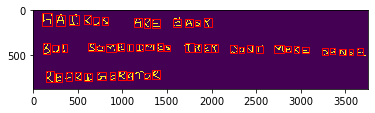

([(34, 102, 178, 215),
  (47, 253, 172, 352),
  (50, 402, 166, 510),
  (53, 566, 158, 648),
  (72, 668, 165, 743),
  (74, 773, 161, 840),
  (84, 1910, 184, 2000),
  (88, 1128, 188, 1220),
  (89, 1239, 198, 1307),
  (95, 1333, 193, 1423),
  (98, 1565, 185, 1660),
  (98, 1703, 191, 1793),
  (104, 1811, 180, 1873),
  (367, 613, 457, 694),
  (367, 1697, 468, 1800),
  (370, 109, 491, 188),
  (370, 945, 456, 1019),
  (371, 1393, 454, 1459),
  (376, 1048, 458, 1123),
  (376, 1253, 445, 1358),
  (376, 1991, 464, 2078),
  (377, 319, 467, 382),
  (378, 1809, 466, 1877),
  (379, 1154, 457, 1236),
  (381, 813, 466, 925),
  (381, 1911, 466, 1991),
  (384, 1471, 451, 1534),
  (388, 208, 472, 292),
  (388, 2207, 479, 2290),
  (389, 2700, 478, 2810),
  (392, 2397, 471, 2466),
  (395, 710, 459, 789),
  (395, 2493, 473, 2577),
  (396, 2827, 470, 2889),
  (397, 2919, 477, 2985),
  (409, 2311, 473, 2367),
  (409, 3010, 479, 3090),
  (419, 3233, 497, 3303),
  (426, 3324, 490, 3386),
  (427, 3631, 497, 3695

In [54]:
image = skimage.io.imread("D:/CMU - Semester 1/16720- Computer Vision/hw5/images/03_haiku.jpg")
findLetters(image)
